# My First Notebook
Proposition 56 analysis by Matt DeVries.  This is a sample notebook prepared as part of the Python for Data Journalists class.  The Proposition 56 was a California initiative to add a $2 sales tax on packs of cigarettes.  The initiative was passed in November 2017.  The following is an analysis of contributions to the campaign for Proposition 56.

This analysis is run in Python using the pandas and matplotlib libraries.

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

## Reading and prepping data
Reading in the list of propositions and committees.

In [4]:
props = pd.read_csv("http://www.firstpythonnotebook.org/_static/committees.csv")

Read in the list of contriubtions to ballot measures.

In [7]:
contribs = pd.read_csv("http://www.firstpythonnotebook.org/_static/contributions.csv")

Created a new data frame for Proposition 56 committees.

In [13]:
cig_prop = props[props.prop_name == "PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTHCARE, TOBACCO USE PREVENTION, RESEARCH, AND LAW ENFORCEMENT. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE."]

Merge data about contributors with data about all of the committees.

In [69]:
merged_all = pd.merge(props, contribs, on = "calaccess_committee_id")

In [18]:
merged = pd.merge(cig_prop, contribs, on = "calaccess_committee_id")

Sort initiatives by amount of contributions.

In [71]:
merged_all.groupby("prop_name").amount.sum().reset_index().sort_values("amount", ascending = False)

,prop_name,amount
10,PROPOSITION 061- STATE PRESCRIPTION DRUG PURCH...,1.273146e+08
5,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,8.836929e+07
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,5.665873e+07
13,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,3.517702e+07
15,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,3.429124e+07
11,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,3.283668e+07
2,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,2.234050e+07
6,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,2.009737e+07
1,PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...,1.628314e+07
0,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,1.298794e+07


Propoistion 56 received the second most contributions from large donors in November 2017 election.  Let's look further into contributions for the Prop. 56 campaign.

## General info about Prop. 56 contributors
Calculate the proportion of large contributions that opposed the initiative.

In [22]:
support = merged[merged.committee_position == "SUPPORT"].amount.sum()

In [23]:
opposed = merged[merged.committee_position == "OPPOSE"].amount.sum()

In [34]:
print "Share of contributors opposing Prop. 56: %s%%" % round(opposed/(support + opposed) * 100)

Share of contributors opposing Prop. 56: 62.0%


Report of amounts raised by Prop. 56 committees.

In [43]:
merged.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending = False)

,committee_name_x,amount
6,NO ON 56 - STOP THE SPECIAL INTEREST TAX GRAB....,54650500.00
9,"YES ON 56 - SAVES LIVES CALIFORNIA, A COALITIO...",29267861.00
5,"MILLION VOTER PROJECT ACTION FUND - YES ON 55,...",2110000.00
3,"FIGHT CANCER - YES ON 56, SPONSORED BY AMERICA...",801450.00
4,MILLION VOTER PROJECT ACTION FUND - YES ON 55 ...,426035.55
1,"CALIFORNIA KIDS CAMPAIGN, YES ON PROPS 55 & 56...",295000.00
2,"COMMON SENSE KIDS ACTION, INC., YES ON PROPS. ...",295000.00
10,YES ON 56 STOP CANCER - PLANNED PARENTHOOD ADV...,250000.00
11,YES ON 56 STOP CANCER - PLANNED PARENTHOOD OF ...,200000.00
7,"PICO CALIFORNIA - YES ON 55, 56, AND 57 (NON P...",37941.12


Sort individual contributions by employer.

In [42]:
merged.groupby(["contributor_employer", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False).head(20)

,contributor_employer,committee_position,amount
17,NEXTGEN CLIMATE,SUPPORT,11300000.0
12,FARALLON CAPITAL,SUPPORT,1750000.0
6,BLOOMBERG LP,SUPPORT,500000.0
1,AKONADI FOUNDATION,SUPPORT,75000.0
4,ARTICLE 3 ADVISORS,SUPPORT,50000.0
14,KAITLYN TRIGGER KRIEGER,SUPPORT,25000.0
0,ADAM GUNTHER,SUPPORT,10000.0
18,NONE,SUPPORT,2512.0
27,"TELFORD'S PIPE & CIGAR, INC.",OPPOSE,1000.0
29,"UNIVERSITY OF CALIFORNIA, LOS ANGELES",SUPPORT,500.0


## Report the largest donors for Prop. 56
Clean up the database to facilitate grouping donations by donor.

In [49]:
merged['contributor_fullname'] = merged.contributor_firstname + " " + merged.contributor_lastname

In [48]:
def steyer_fix(row):
    if row.contributor_fullname == "THOMAS F. STEYER":
        return "THOMAS STEYER"
    return row.contributor_fullname

In [50]:
def combine_names(row):
    if row.is_org:
        return row.contributor_lastname
    return row.contributor_fullname

In [53]:
merged["contributor_fullname"] = merged.apply(steyer_fix, axis = 1)

In [55]:
merged['is_org'] = merged.contributor_firstname.isnull()

In [56]:
merged['contributor_cleanname'] = merged.apply(combine_names, axis = 1)

Report on the top contributors to Prop. 56 campaign.

In [58]:
merged.groupby(["contributor_cleanname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,contributor_cleanname,committee_position,amount
82,PHILIP MORRIS USA INC. (MADE BY ITS SERVICE CO...,OPPOSE,28450188.0
97,R.J. REYNOLDS TOBACCO COMPANY (MADE BY ITS SER...,OPPOSE,20140000.0
115,THOMAS STEYER,SUPPORT,13050000.0
16,"CA HOSPITALS COMMITTEE ON ISSUES, (CHCI) SPONS...",SUPPORT,9000000.0
120,"UST LLC (MADE BY ITS SERVICE COMPANY, ALTRIA C...",OPPOSE,3299144.0
24,CALIFORNIA STATE COUNCIL OF SERVICE EMPLOYEES ...,SUPPORT,2000000.0
48,ITG BRANDS LLC,OPPOSE,1050000.0
51,JOHN MIDDLETON CO. (MADE BY ITS SERVICE COMPAN...,OPPOSE,1018660.0
22,CALIFORNIA MEDICAL ASSOCIATION,SUPPORT,1000000.0
20,CALIFORNIA DENTAL ASSOCIATION,SUPPORT,1000000.0


In [61]:
top_contributors = merged.groupby(["contributor_cleanname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

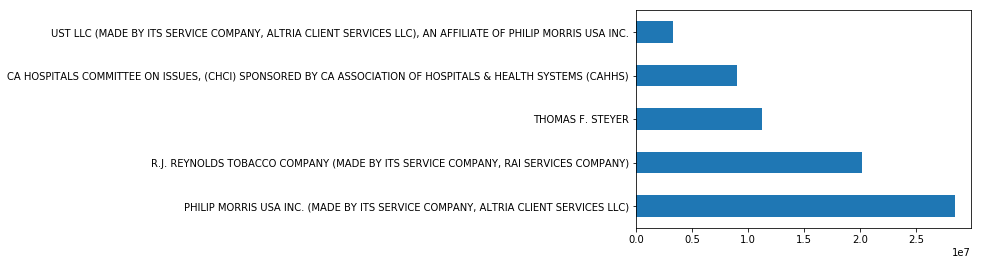

In [68]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_cleanname)